In [1]:
#https://mubaris.com/2017/10/01/kmeans-clustering-in-python/

from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (16, 9)
# plt.style.use("ggplot")

#importing the dataset
data:pd.DataFrame = pd.read_csv("d:\\data\\xclara.csv")
print(data.shape)
data.head()

(3000, 2)


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>V1</th>
      <th>V2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2.072345</td>
      <td>-3.241693</td>
    </tr>
    <tr>
      <th>1</th>
      <td>17.936710</td>
      <td>15.784810</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.083576</td>
      <td>7.319176</td>
    </tr>
    <tr>
      <th>3</th>
      <td>11.120670</td>
      <td>14.406780</td>
    </tr>
    <tr>
      <th>4</th>
      <td>23.711550</td>
      <td>2.557729</td>
    </tr>
  </tbody>
</table>
</div>

In [2]:
#Getting the values and plotting it
f1: np.ndarray = data["V1"].values
f2: np.ndarray = data["V2"].values
X: np.ndarray = np.array(list(zip(f1, f2)))
# print(X[:3])
plt.scatter(f1, f2, c="black", s=7)
plt.legend()
plt.show()

In [3]:
# Euclidean Distance Calculate
from typing import Union

def dist(a: np.ndarray, b: np.ndarray, ax=1)-> Union[float, np.ndarray]:
    return np.linalg.norm(a - b, axis=ax)



In [4]:
#number of cluster
k: int = 3
#X coordinates of random centroids
x_max: float = np.max(f1)
y_max: float = np.max(f2)
# print(x_max, np.max(f1), np.max(f2))
c_x: np.ndarray = np.random.randint(low=0, high=x_max - 20, size=k)
c_y: np.ndarray = np.random.randint(low=0, high=y_max - 20, size=k)
# print(c_x, "\n", c_y)
centroids: np.ndarray = np.array(list(zip(c_x, c_y)), dtype=np.float32)
# centroids
plt.scatter(f1, f2, c="#050505", s=7)
plt.scatter(c_x, c_y, marker="*", c="g", s=200)
plt.legend()
plt.show()

In [5]:
# To store the value of centroids when it updates
c_old: np.ndarray = np.zeros(centroids.shape)
#cluster labels(0,1,2)
clusters: np.ndarray = np.zeros(len(X))
#Error function, - Distance between new centroids and old centroids
error: np.ndarray = dist(centroids, c_old, None)
# dis = np.array([np.sqrt(p[0]**2 + p[1]**2) for p in centroids - c_old])
# print(dis.__class__, dis, np.sqrt(sum([d **2 for d in dis])))
# print(error.__class__, error)
#Loop will run till the error becomes zero
while error >= 1:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distance: np.ndarray = dist(X[i], centroids)
        # get the indices of the minimum elements
        cluster: np.ndarray = np.argmin(distance)
        clusters[i] = cluster
    # Storing the old centroid values
    c_old = deepcopy(centroids)
    #Finding the new centroids by taking the average value
    for i in range(k):
        points: list = [X[j] for j in range(len(X)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        
    error = dist(centroids, c_old, None)


In [6]:
from typing import *

colors: list = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.legend()
plt.show()

In [8]:
from sklearn.cluster import KMeans

#number of clusters
kmeans: KMeans = KMeans(n_clusters=3)
#Fitting the input data
kmeans = kmeans.fit(X)
#Getting the cluster labels
labels: Any = kmeans.predict(X)
print(labels.__class__, labels)
#Centroid values
centroids:Any = kmeans.cluster_centers_
print(centroids.__class__, centroids)

<class 'numpy.ndarray'> [1 1 1 ..., 0 0 0]
<class 'numpy.ndarray'> [[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


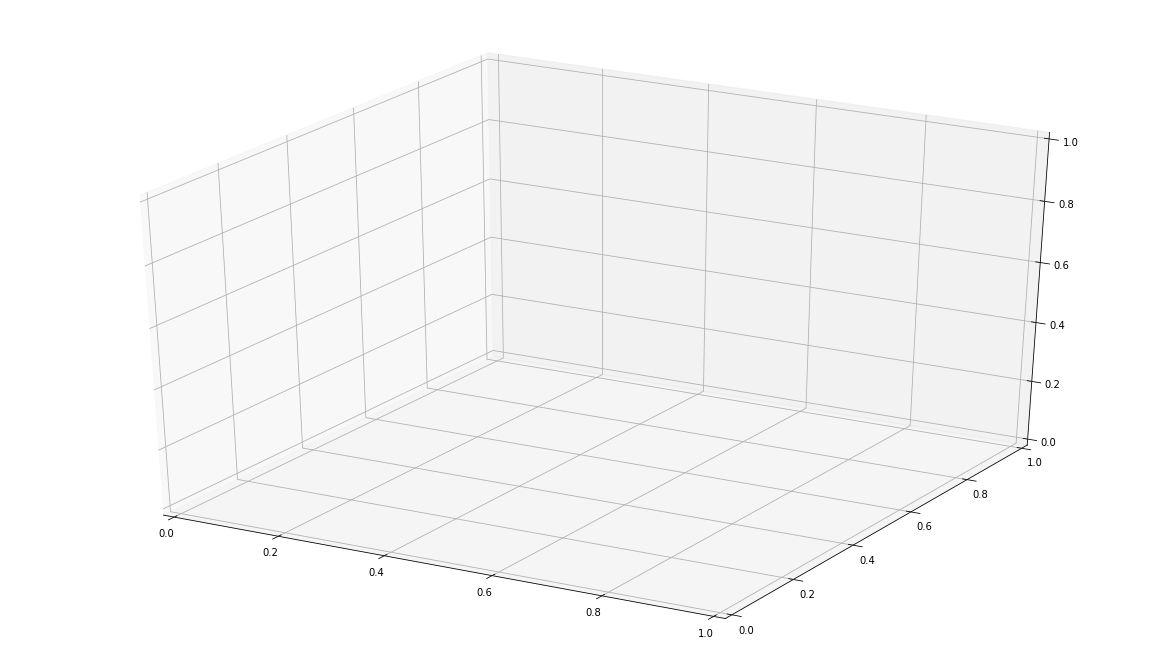

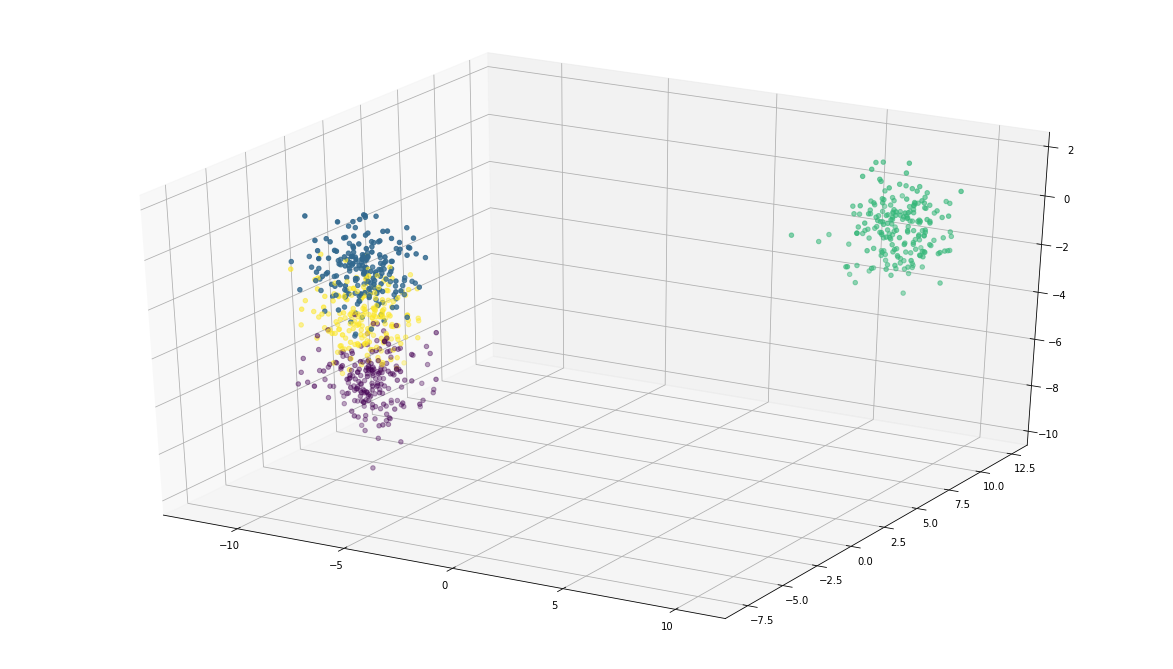

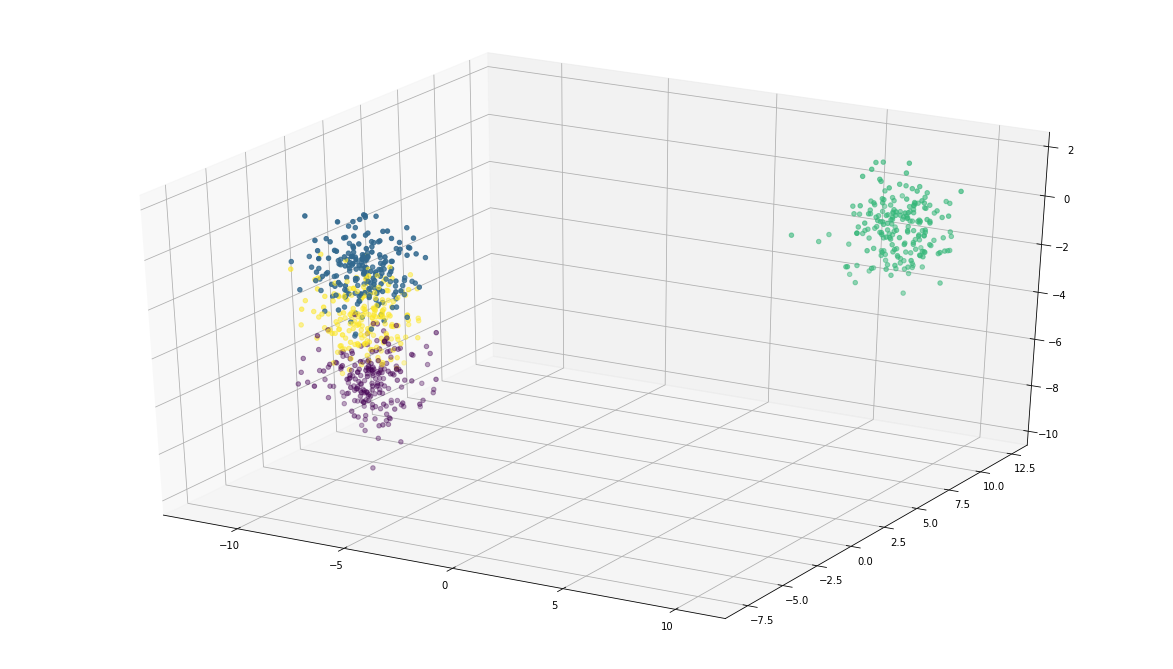

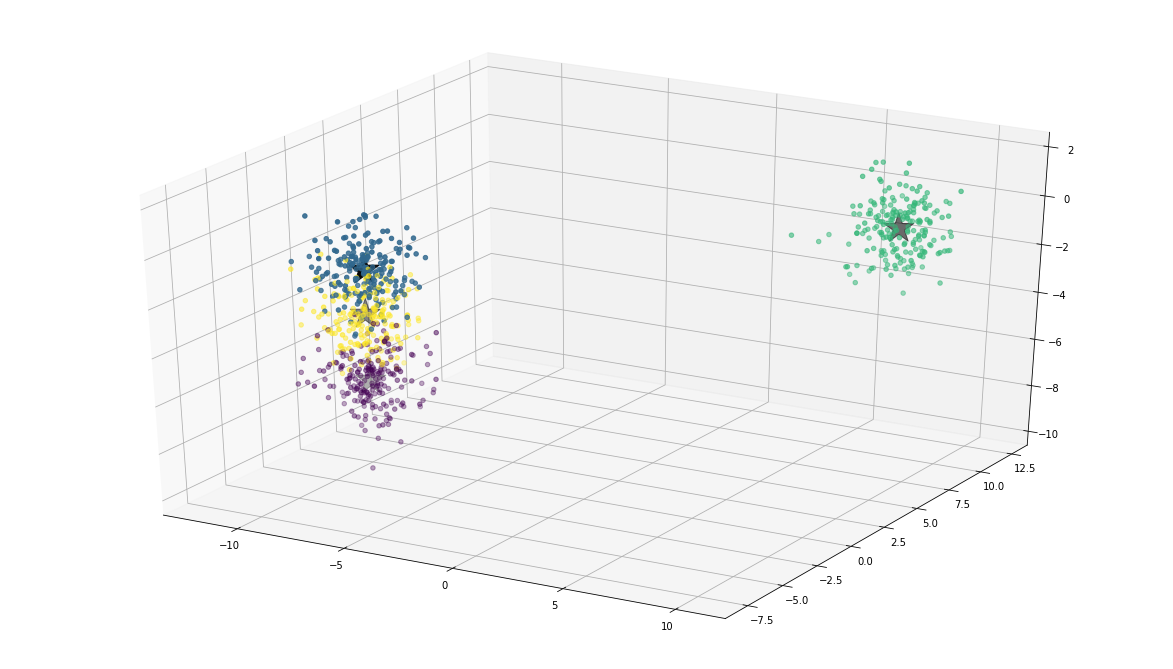

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

plt.rcParams["figure.figsize"] = (16, 9)
#creating a sample dataset with 4 clusters
mx, my = make_blobs(n_samples=800, n_features=3, centers=4)
# print(mx.__class__, mx)
# print(my.__class__, my)

x_3: np.ndarray = mx
c_x: np.ndarray = my

fig: plt.Figure = plt.figure()
ax: Axes3D = Axes3D(fig)
ax.scatter(x_3[:, 0], x_3[:, 1], x_3[:, 2])
plt.show()


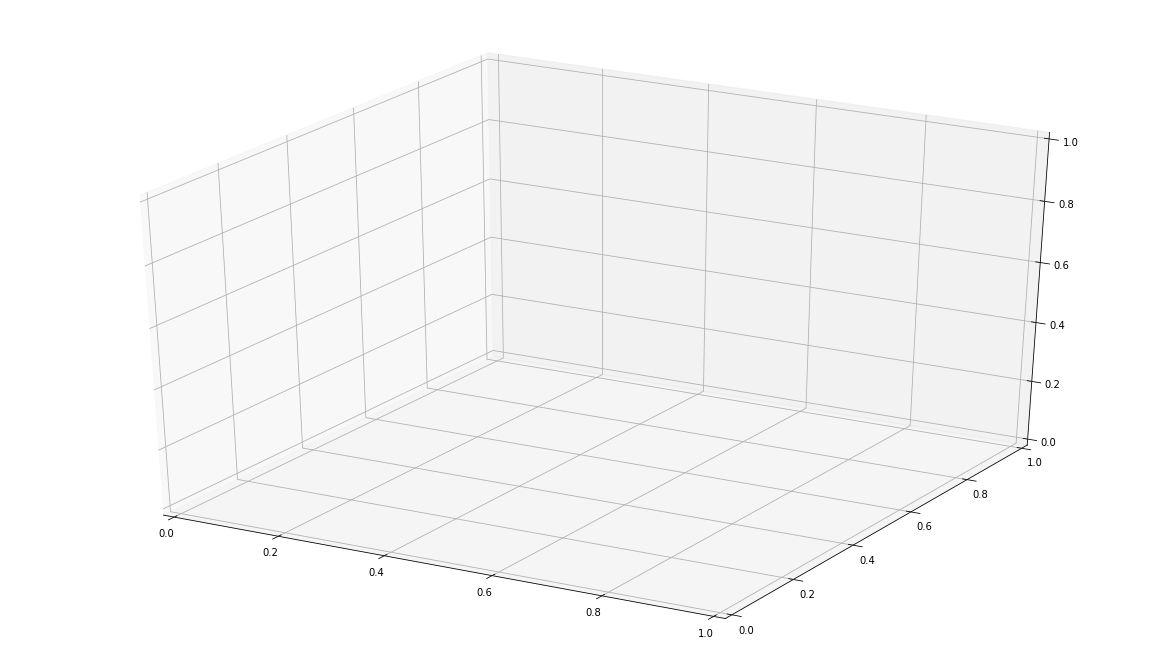

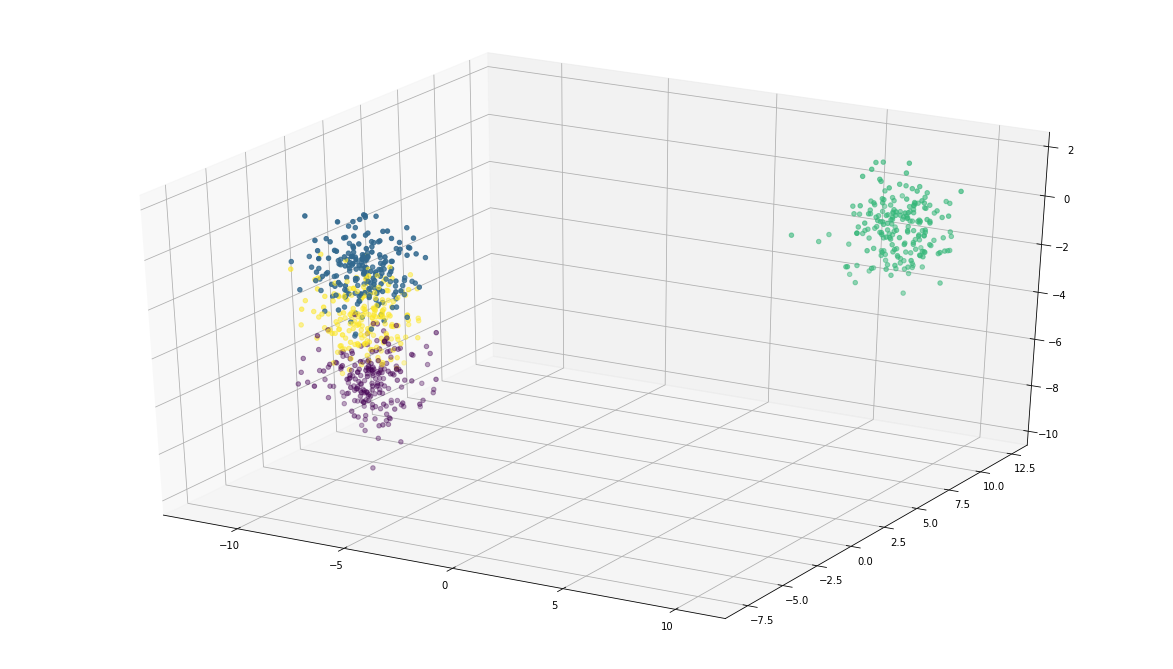

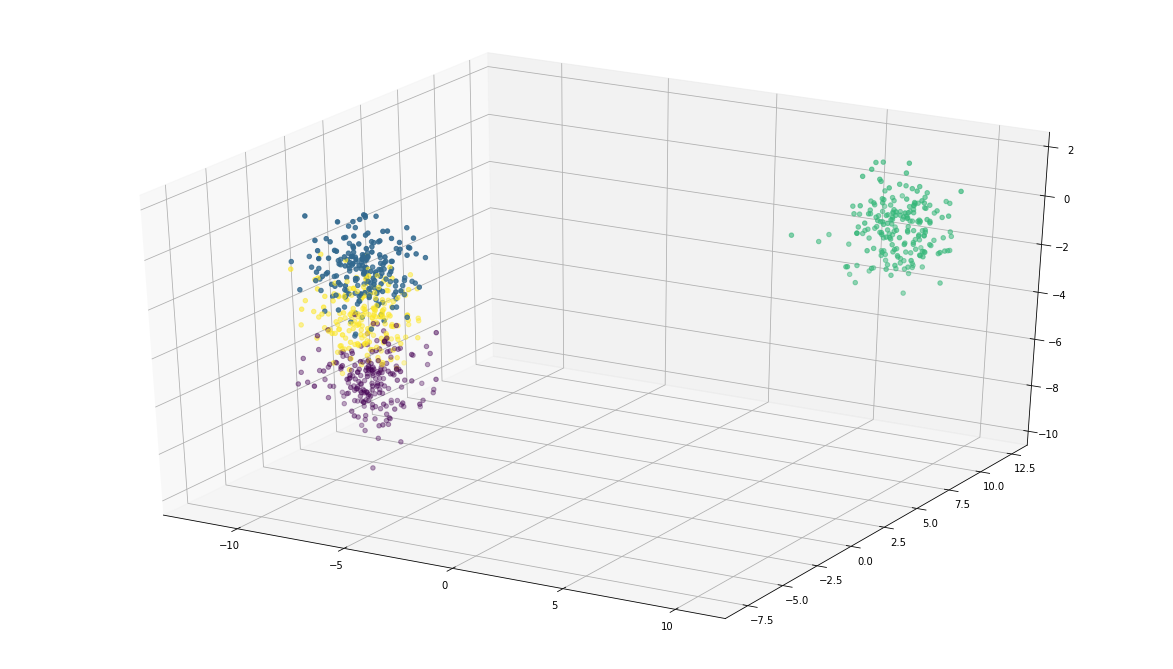

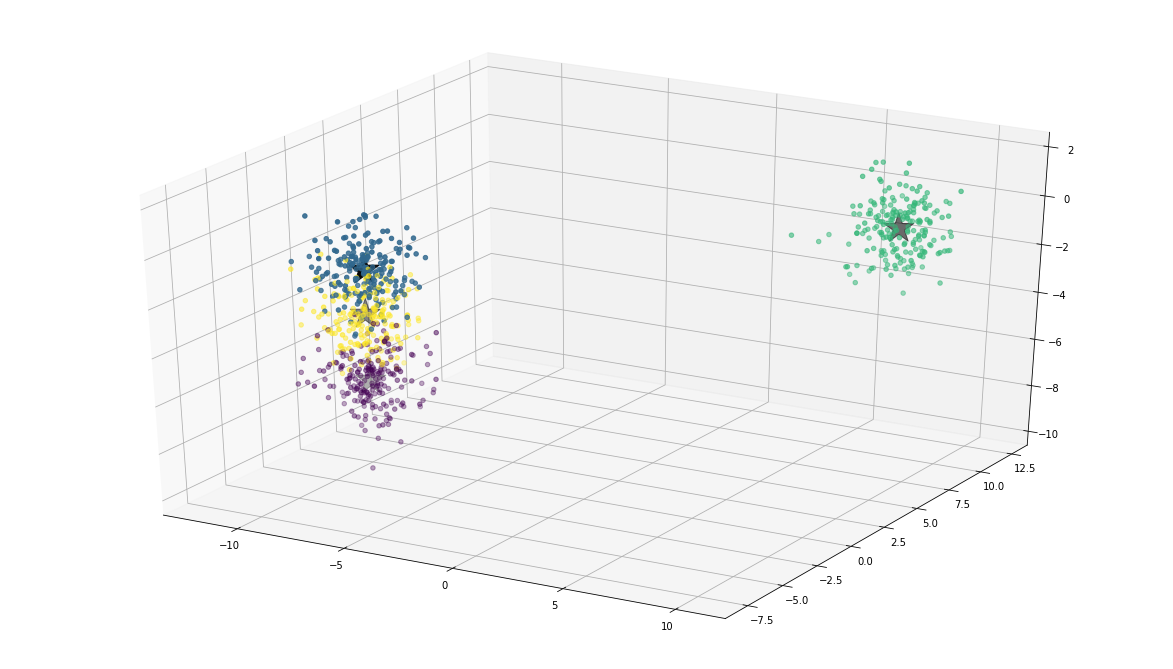

In [23]:
#Initializing KMeans
kmeans = KMeans(n_clusters=4)

# Fitting with inputs
kmeans = kmeans.fit(x_3)
# Predicting the clusters
labels = kmeans.predict(x_3)
# Getting the cluster centers
c_3 = kmeans.cluster_centers_
print(c_3.__class__,c_3)

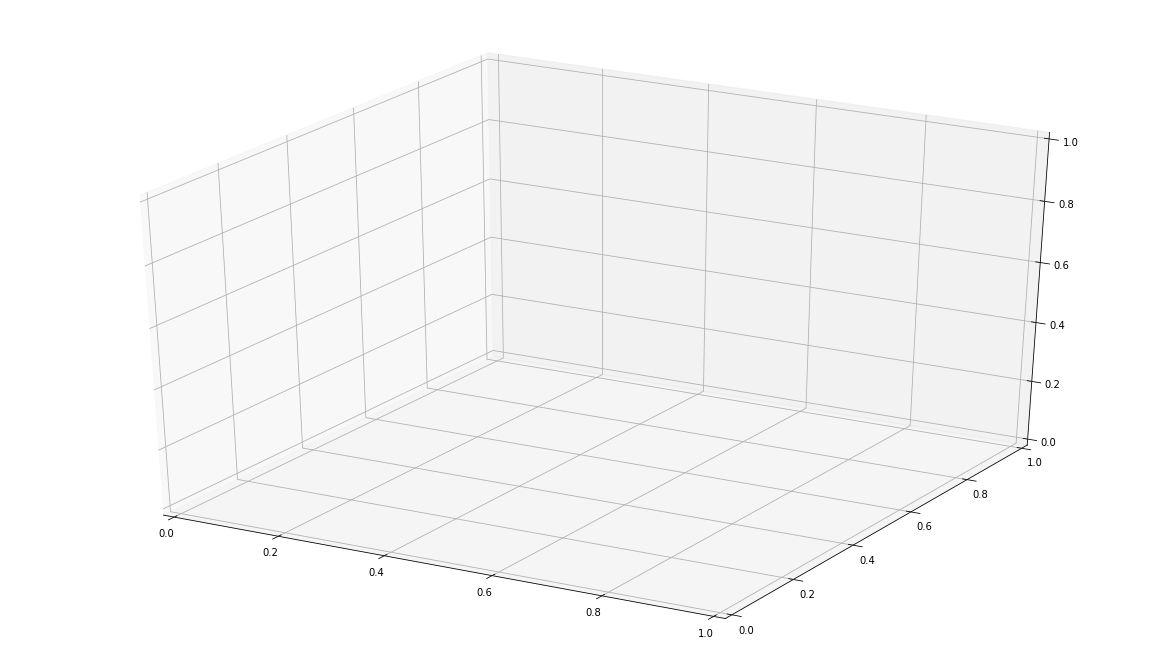

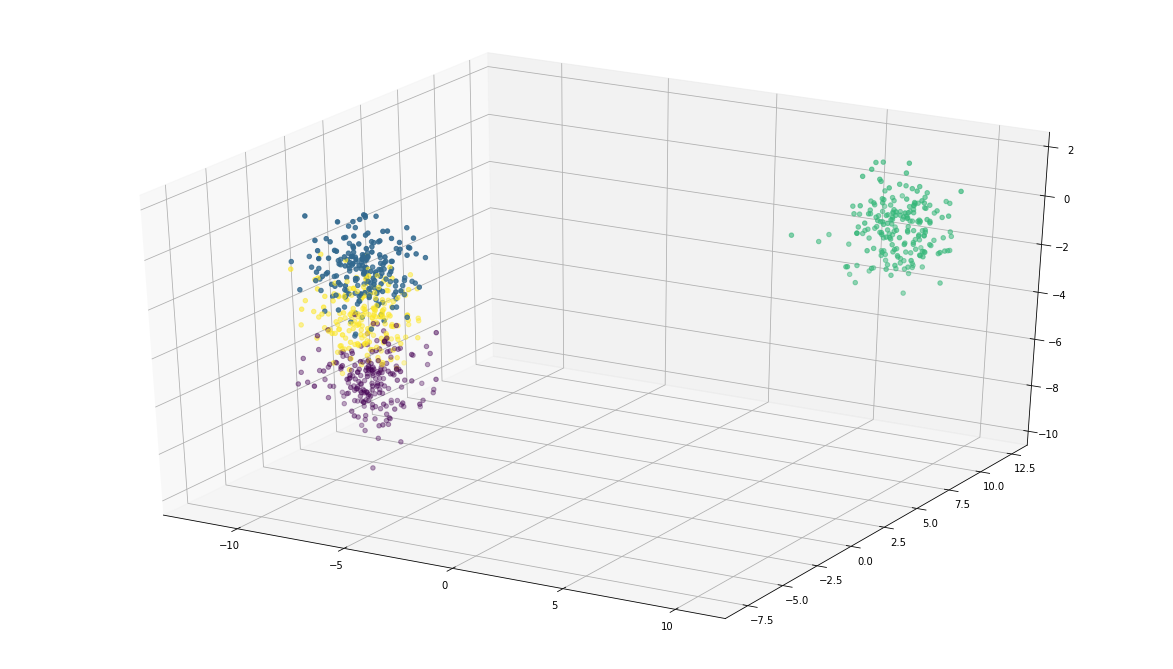

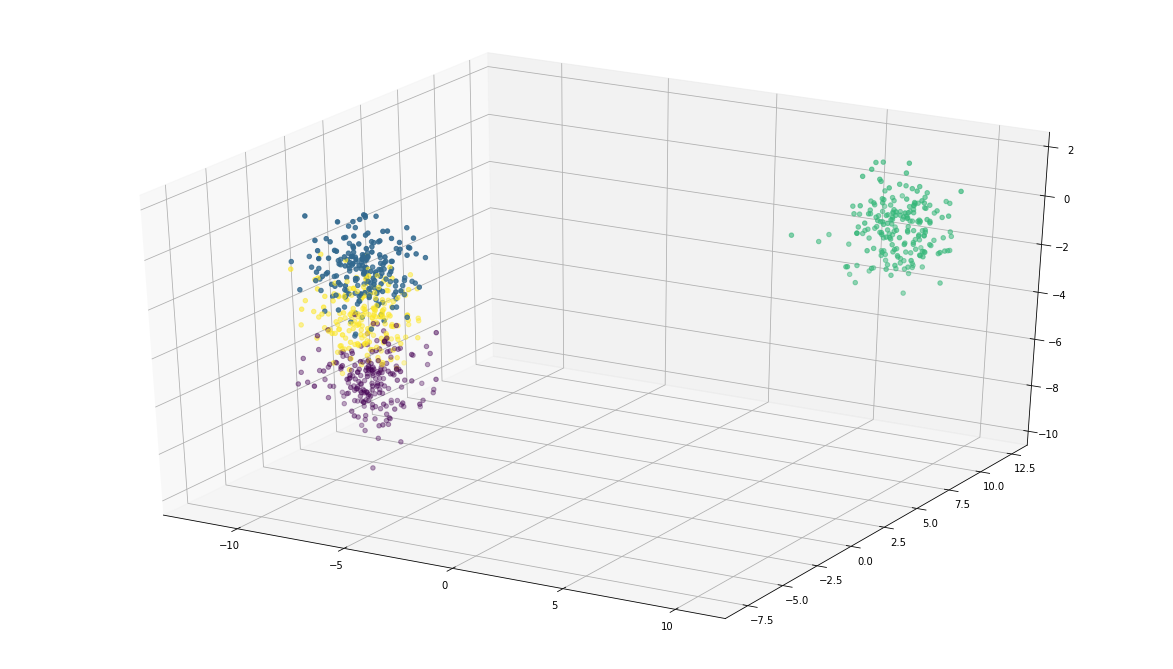

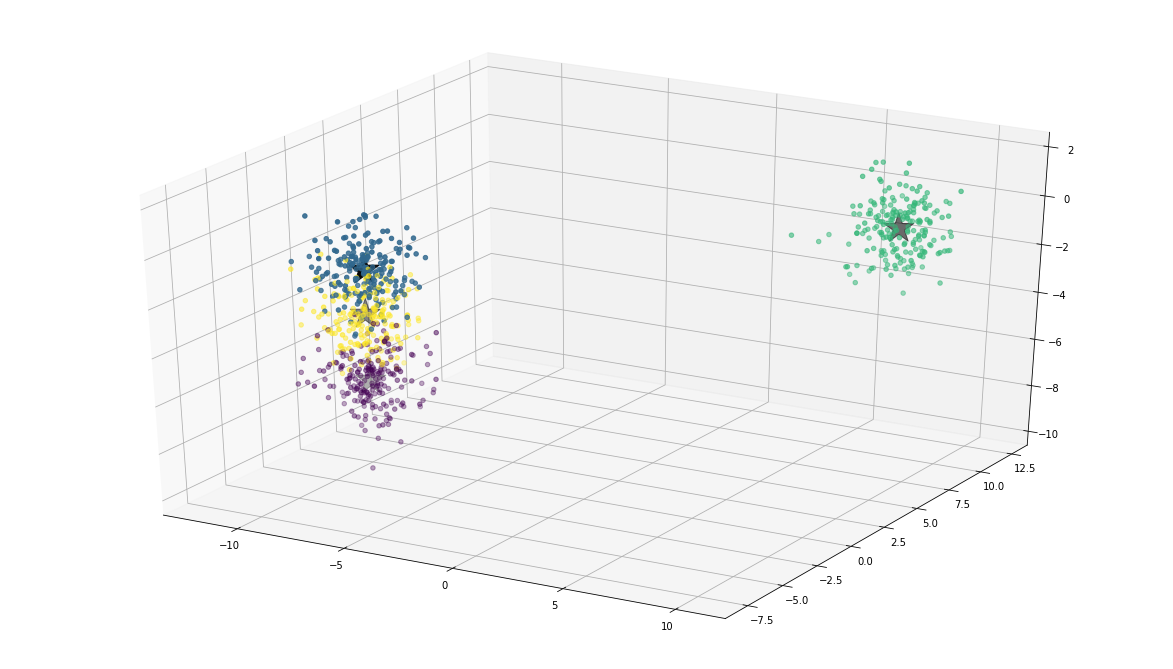

In [25]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_3[:, 0], x_3[:, 1], x_3[:, 2], c=c_x)
ax.scatter(c_3[:, 0], c_3[:, 1], c_3[:, 2], marker='*', c='#050505', s=1000)
plt.show()